# Sur les avantages familiaux

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from datetime import date  # Module nécessaire pour la définition des dates, dont notamment les dates de naissances
import openfisca_france    # Module décrivant le système socio-fiscal français

TaxBenefitSystem = openfisca_france.init_country()  # Initialisation de la classe décrivant le système socio-fiscal français
tax_benefit_system = TaxBenefitSystem()             # Création d'une instance du système socio-fiscal français 

In [3]:
ma_liste = ["a"]
print ma_liste
print ma_liste * 2
print ma_liste * 10
print ma_liste * 0

['a']
['a', 'a']
['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']
[]


In [4]:
def couple_avec_enfants(nombre_enfants = 0, year = 2014):
    enfant = [dict(
        birth = date(2005, 1, 1),
        )]
    enfants = enfant * nombre_enfants
    simulation = tax_benefit_system.new_scenario().init_single_entity(
        axes = [
            dict(
                count = 100,
                min = 0,
                max = 200000 * 3,
                name = 'sal',
                ),
            ],
        period = "{}:3".format(year-2),
        parent1 = dict(
            birth = date(1980, 1, 1),
            ),
        parent2 = dict(
            birth = date(1980, 1, 1)
            ),
        enfants = enfants,
        menage = dict(
            loyer = 1000,
            so = 4,
            ),
        ).new_simulation(debug = True)
    return simulation

In [5]:
enfant = [dict(
        birth = date(2005, 1, 1),
        )]
enfants = enfant * 2
enfants

[{'birth': datetime.date(2005, 1, 1)}, {'birth': datetime.date(2005, 1, 1)}]

In [6]:
year = 2014  # de 2011 à 2014
couple_0_enfant = couple_avec_enfants(nombre_enfants = 0, year = year)
couple_1_enfant = couple_avec_enfants(nombre_enfants = 1, year = year)
couple_2_enfant = couple_avec_enfants(nombre_enfants = 2, year = year)
couple_3_enfant = couple_avec_enfants(nombre_enfants = 3, year = year)

In [7]:
salaire_imposable = couple_0_enfant.calculate('sal', period = year)
salaire_imposable.shape
salaire_imposable

array([      0.        ,       0.        ,    2020.20202637,
             0.        ,    4040.40405273,       0.        ,
          6060.60595703,       0.        ,    8080.80810547,
             0.        ,   10101.01074219,       0.        ,
         12121.21191406,       0.        ,   14141.4140625 ,
             0.        ,   16161.61621094,       0.        ,
         18181.81835938,       0.        ,   20202.02148438,
             0.        ,   22222.22070312,       0.        ,
         24242.42382812,       0.        ,   26262.625     ,
             0.        ,   28282.828125  ,       0.        ,
         30303.03125   ,       0.        ,   32323.23242188,
             0.        ,   34343.43359375,       0.        ,
         36363.63671875,       0.        ,   38383.83984375,
             0.        ,   40404.04296875,       0.        ,
         42424.2421875 ,       0.        ,   44444.44140625,
             0.        ,   46464.64453125,       0.        ,
         48484.84765625,

In [20]:
salaire_imposable = couple_0_enfant.calculate('sal', period = year)[:200:2] 
# salaire imposable est une variable associée à l'entité individu
salaire_imposable

array([      0.        ,    2020.20202637,    4040.40405273,
          6060.60595703,    8080.80810547,   10101.01074219,
         12121.21191406,   14141.4140625 ,   16161.61621094,
         18181.81835938,   20202.02148438,   22222.22070312,
         24242.42382812,   26262.625     ,   28282.828125  ,
         30303.03125   ,   32323.23242188,   34343.43359375,
         36363.63671875,   38383.83984375,   40404.04296875,
         42424.2421875 ,   44444.44140625,   46464.64453125,
         48484.84765625,   50505.05078125,   52525.25      ,
         54545.453125  ,   56565.65625   ,   58585.859375  ,
         60606.0625    ,   62626.26171875,   64646.46484375,
         66666.6640625 ,   68686.8671875 ,   70707.0703125 ,
         72727.2734375 ,   74747.4765625 ,   76767.6796875 ,
         78787.8828125 ,   80808.0859375 ,   82828.28125   ,
         84848.484375  ,   86868.6875    ,   88888.8828125 ,
         90909.09375   ,   92929.2890625 ,   94949.5       ,
         96969.6953125 ,

In [9]:
revdisp0 = couple_0_enfant.calculate("revdisp", period = year)
revdisp1 = couple_1_enfant.calculate("revdisp", period = year)
revdisp2 = couple_2_enfant.calculate("revdisp", period = year)
revdisp3 = couple_3_enfant.calculate("revdisp", period = year)
type(couple_0_enfant)

openfisca_core.simulations.Simulation

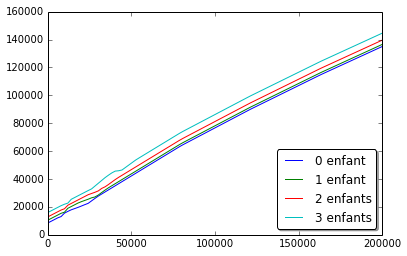

In [10]:
fig = plt.figure()
plt.plot(salaire_imposable, revdisp0, label = "0 enfant")
plt.plot(salaire_imposable, revdisp1, label = "1 enfant")
plt.plot(salaire_imposable, revdisp2, label = "2 enfants")
plt.plot(salaire_imposable, revdisp3, label = "3 enfants")
plt.legend(loc = 4, shadow=True, fancybox=True)

Exercice: Faire le même graphe en utilisant une boucle

## Gain lié à l'enfant marginal

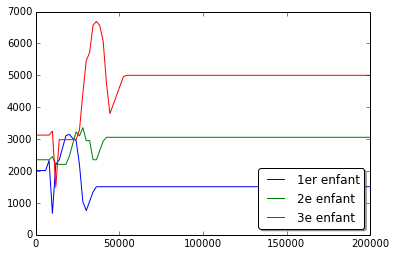

In [13]:
fig = plt.figure()
plt.plot(salaire_imposable, revdisp1 - revdisp0, label = "1er enfant")
plt.plot(salaire_imposable, revdisp2 - revdisp1, label = "2e enfant")
plt.plot(salaire_imposable, revdisp3 - revdisp2, label = "3e enfant")
plt.legend(loc = 4, shadow=True, fancybox=True)

In [14]:
from openfisca_matplotlib.dataframes import data_frame_from_decomposition_json as to_data_frame

ImportError: No module named pandas

In [15]:
to_data_frame(couple_3_enfant, remove_null = True)

NameError: name 'to_data_frame' is not defined

In [ ]:
comprendre les différentes composantes (aller retour avec l'appli)

In [ ]:
gain à l'enfant marginal, manuel puis boucle et liste compréhension